Load environment variable from .env file with python-dotenv package

In [1]:
import os
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

arcgis_user = os.getenv("ARCGIS_USER")
arcgis_pass = os.getenv("ARCGIS_PASS")
arcgis_portal = os.getenv("ARCGIS_PORTAL")

Make GIS object

In [2]:
from arcgis.gis import GIS
gis = GIS(arcgis_portal, arcgis_user, arcgis_pass)
gis

GIS @ https://pcovidjatim.maps.arcgis.com version:8.1

Load jatim layer item by id

<Item title:"Jawa Timur" type:Feature Layer Collection owner:prediksicovidjatim>
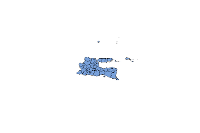

In [3]:
jatim_id = '2e29df69a57d4ca59f5c2a9fdf11217f'
jatim = gis.content.get(jatim_id)
jatim

In [4]:
jatim.layers

[<FeatureLayer url:"https://services2.arcgis.com/gxevpFKXaRT0UMCs/arcgis/rest/services/Jawa_Timur/FeatureServer/0">]

In [5]:
for lyr in jatim.layers:
    print(lyr.properties.name)

Jawa_Timur


What operations can be done for the layer?

By default, a layer only has Query capability. If it doesn't have update?editing? capability, then it can't be edited. You can turn on the edit capability at the layer's settings. Of course, you need the permission to do it from the owner.

In [6]:
jatim_layer = jatim.layers[0]
jatim_layer.properties.capabilities

'Create,Delete,Query,Update,Editing,Extract,Sync,ChangeTracking'

What fields does it have?

In [7]:
jatim_layer.properties.fields

[{
   "name": "FID",
   "type": "esriFieldTypeOID",
   "actualType": "int",
   "alias": "FID",
   "sqlType": "sqlTypeInteger",
   "nullable": false,
   "editable": false,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "ID",
   "type": "esriFieldTypeDouble",
   "actualType": "float",
   "alias": "ID",
   "sqlType": "sqlTypeFloat",
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "Kabupaten_",
   "type": "esriFieldTypeString",
   "actualType": "nvarchar",
   "alias": "Kabupaten_",
   "sqlType": "sqlTypeNVarchar",
   "length": 55,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "Provinsi",
   "type": "esriFieldTypeString",
   "actualType": "nvarchar",
   "alias": "Provinsi",
   "sqlType": "sqlTypeNVarchar",
   "length": 50,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "Shape__Area",
   "type": "esriFieldTypeDou

Show jatim in map

In [26]:
map = gis.map("Jawa Timur", zoomlevel=8)
map.add_layer(jatim)
map

MapView(layout=Layout(height='400px', width='100%'))

You can query the layer

In [9]:
query_result1 = jatim_layer.query(where='ODP<12', out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
len(query_result1.features)

0

In [10]:
query_result1

<FeatureSet> 0 features

In [11]:
query_result1.sdf

""


To access the feature data, you must do a query; it can be empty.

In [12]:
jatim_fset = jatim_layer.query()
jatim_fset.sdf

,FID,ID,Kabupaten_,Provinsi,Shape__Area,Shape__Length,GlobalID,CreationDate,Creator,EditDate,Editor,ODP,PDP,SHAPE
0,1,1,BANGKALAN,Jawa Timur,1.335694e+09,181458.097516,4ae0895e-f1c7-4a0d-b218-e4807a5efd0b,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:31:48.046999931,prediksicovidjatim,1058.0,None,"{""rings"": [[[12591669.5395945, -789994.2297997..."
1,2,2,BANYUWANGI,Jawa Timur,3.643262e+09,429983.627406,cecb28ce-1c25-4282-bbfe-89437b26a2fc,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:38.184000015,prediksicovidjatim,NaN,None,"{""rings"": [[[12737080.6244433, -885720.3503675..."
2,3,3,BLITAR,Jawa Timur,1.782871e+09,261216.926244,78591637-ab91-4f0b-97f4-e2a68e3eef94,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:39.982000113,prediksicovidjatim,NaN,None,"{""rings"": [[[12506699.594911, -932213.66706938..."
3,4,4,BOJONEGORO,Jawa Timur,2.398399e+09,292768.403958,688f288f-a063-4e2f-8a85-935cad295a70,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:40.466000080,prediksicovidjatim,NaN,None,"{""rings"": [[[12477917.7179274, -810460.9532501..."
4,5,5,BONDOWOSO,Jawa Timur,1.592650e+09,215099.794452,8e434d1a-d9b8-4c51-9dcd-3813d7a14098,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:42.246999979,prediksicovidjatim,NaN,None,"{""rings"": [[[12697455.8950979, -907009.4524894..."
5,6,6,GRESIK,Jawa Timur,1.246202e+09,335981.197273,758bed13-71d8-438d-b6fc-17eff23e3706,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:43.059999943,prediksicovidjatim,NaN,None,"{""rings"": [[[12516708.6642867, -767048.2590046..."
6,7,7,JEMBER,Jawa Timur,3.445774e+09,396761.986893,a87988f9-f49e-4246-a145-29a8d0a95021,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:44.898999929,prediksicovidjatim,NaN,None,"{""rings"": [[[12612632.0015863, -927845.5466376..."
7,8,8,JOMBANG,Jawa Timur,1.122795e+09,190119.682156,1ea800b5-ffb3-4e7c-869d-b52dc16c9092,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:45.107000113,prediksicovidjatim,NaN,None,"{""rings"": [[[12518356.30407, -868319.191789681..."
8,9,9,KEDIRI,Jawa Timur,1.571780e+09,262870.861173,f164d6c9-e5fc-4ff0-a210-d06a7d091870,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:47.414000034,prediksicovidjatim,NaN,None,"{""rings"": [[[12464442.7162059, -894629.8309977..."
9,10,10,Kota BATU,Jawa Timur,1.958145e+08,75233.067869,d89e6027-4214-4947-ba74-b357dffc4b70,2020-06-26 04:34:50.733999968,prediksicovidjatim,2020-06-26 06:21:49.507999897,prediksicovidjatim,NaN,None,"{""rings"": [[[12521095.2088214, -867166.1302547..."


Get surabaya feature. You can also query but eh I love list comprehension

In [13]:
jatim_fs = jatim_fset.features
surabaya_f = [f for f in jatim_fs if "SURABAYA" in f.attributes["Kabupaten_"]][0]
surabaya_f.attributes

{'FID': 17,
 'ID': 126,
 'Kabupaten_': 'Kota SURABAYA',
 'Provinsi': 'Jawa Timur',
 'Shape__Area': 334241941.148438,
 'Shape__Length': 106052.476058531,
 'GlobalID': 'ec61e474-010c-4e0a-9d2f-63898a155897',
 'CreationDate': 1593146090734,
 'Creator': 'prediksicovidjatim',
 'EditDate': 1593153303929,
 'Editor': 'prediksicovidjatim',
 'ODP': 12,
 'PDP': None,
 'SHAPE': {'rings': [[[12546281.2436134, -819061.286210294],
    [12546187.8465606, -819153.546452475],
    [12545831.9581486, -819434.705541132],
    [12545400.4838023, -819826.535080167],
    [12544954.6492416, -820082.892708373],
    [12544508.814681, -820326.343882396],
    [12544236.9724845, -820440.156872143],
    [12544208.9199728, -820460.13590504],
    [12544156.2658537, -820513.114053505],
    [12544045.8369188, -820566.092258269],
    [12543966.0208439, -820627.039711785],
    [12543929.5080509, -820645.671913183],
    [12543870.9539988, -820678.671130343],
    [12543802.1585534, -820711.558127002],
    [12543690.0598262, 

In [14]:
surabaya_fset = jatim_layer.query(where="FID=17", out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
surabaya_fset.sdf

,FID,ID,Provinsi,Kabupaten_,ODP,SHAPE
0,17,126,Jawa Timur,Kota SURABAYA,12,"{""rings"": [[[12546281.2436134, -819061.2862102..."


let's see the current ODP count of Surabaya then add 1 to it, or set it to 12 if for some reason it's not an int.

In [15]:
surabaya_f.attributes["ODP"]

12

In [16]:
#will this clone it?
surabaya_f_edit = surabaya_f
if isinstance(surabaya_f_edit.attributes["ODP"], int):
    surabaya_f_edit.attributes["ODP"] += 1
else:
    surabaya_f_edit.attributes["ODP"] = 12
surabaya_f_edit.attributes["ODP"]

13

In [17]:
#of course it wouldn't.
surabaya_f.attributes["ODP"]

13

I'll use the original feature var to emphasize that they're the same.

Use updates parameter to update feature. 
Use adds parameter to add new feature. 
Use deletes parameter to delete existing feature. 
Strangely enough, only deletes use string instead of list. It's the string of a feature's objectid.

In [18]:
update_result = jatim_layer.edit_features(updates=[surabaya_f])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 17,
   'uniqueId': 17,
   'globalId': 'ec61e474-010c-4e0a-9d2f-63898a155897',
   'success': True}],
 'deleteResults': []}

In [19]:
surabaya_fset_edit = jatim_layer.query(where="FID=17", out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
surabaya_fset_edit.sdf

,FID,ID,Provinsi,Kabupaten_,ODP,SHAPE
0,17,126,Jawa Timur,Kota SURABAYA,13,"{""rings"": [[[12546281.2436134, -819061.2862102..."


It should be reflected in the original jatim_layer object. But is it reflected in the full feature layer?

In [20]:
map1 = gis.map("Surabaya", zoomlevel=12)
map1.add_layer(jatim)
map1

MapView(layout=Layout(height='400px', width='100%'))

So it is reflected in the original full feature layer. 

Is it reflected in the published feature layer though?

In [21]:
jatim_pub = gis.content.get(jatim_id)
map2 = gis.map("Surabaya", zoomlevel=12)
map2.add_layer(jatim_pub)
map2

MapView(layout=Layout(height='400px', width='100%'))

Heck it does. So the changes made are automatically published too.

What if I only want it locally? Can I?

In [22]:
surabaya_f.attributes["ODP"]

13

In [23]:
surabaya_f.attributes["ODP"] += 1
surabaya_f.attributes["ODP"]

14

In [24]:
surabaya_fset_edit = jatim_layer.query(where="FID=17", out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
surabaya_fset_edit.sdf

,FID,ID,Provinsi,Kabupaten_,ODP,SHAPE
0,17,126,Jawa Timur,Kota SURABAYA,13,"{""rings"": [[[12546281.2436134, -819061.2862102..."


It doesn't work. So changes must be published.